# Fractional diffraction

When the fractional Laplacian operator acts in **2D transverse space** (i.e., $x$ and $y$), the **diffraction-only fractional nonlinear Schrödinger equation** becomes:

$$
\frac{\partial^\delta A(x, y, z)}{\partial z^\delta} = \frac{1}{2} \beta_0^{-\delta} e^{-i\delta\pi/2} \left( \nabla_\perp^2 \right)^\delta A(x, y, z)
$$

where:

* $\delta \in (0,1]$ is the **fractional order**
* $\nabla_\perp^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$
* $A(x, y, z)$ is the field envelope

---

## ✅ General Solution Strategy (2D Case)

To solve this, we use the **2D spatial Fourier transform**, which diagonalizes the Laplacian.

---

### 🔹 Step 1: 2D Fourier Transform

Let:

$$
\tilde{A}(k_x, k_y, z) = \iint A(x, y, z) \, e^{-i(k_x x + k_y y)} \, dx \, dy
$$

Then:

$$
\mathcal{F}\left[\left( \nabla_\perp^2 \right)^\delta A(x, y, z)\right] = |\vec{k}|^{2\delta} \tilde{A}(k_x, k_y, z)
$$

with:

$$
|\vec{k}| = \sqrt{k_x^2 + k_y^2}
$$

---

### 🔹 Step 2: Transformed Equation

The PDE in Fourier space becomes a **fractional ODE in $z$** for each frequency $(k_x, k_y)$:

$$
\frac{d^\delta \tilde{A}(k_x, k_y, z)}{d z^\delta} = \lambda_{\vec{k}} \tilde{A}(k_x, k_y, z)
$$

Where:

$$
\lambda_{\vec{k}} = \frac{1}{2} \beta_0^{-\delta} e^{-i \delta \pi/2} |\vec{k}|^{2\delta}
$$

---

### 🔹 Step 3: Solve Using Mittag-Leffler Function

This linear fractional ODE has the analytical solution:

$$
\tilde{A}(k_x, k_y, z) = \tilde{A}(k_x, k_y, 0) \cdot E_\delta\left( \lambda_{\vec{k}} z^\delta \right)
$$

Where:

* $E_\delta(\cdot)$ is the **Mittag-Leffler function**, which generalizes the exponential function.

---

### 🔹 Step 4: Inverse Fourier Transform

Transform back to real space:

$$
A(x, y, z) = \iint \tilde{A}(k_x, k_y, z) \, e^{i(k_x x + k_y y)} \, dk_x \, dk_y
$$

---

## ✅ Final Solution Form

The final solution is:

$$
A(x, y, z) = \mathcal{F}^{-1}_{2D} \left[ \tilde{A}(k_x, k_y, 0) \cdot E_\delta\left( \lambda_{\vec{k}} z^\delta \right) \right]
$$

Where:

* $\tilde{A}(k_x, k_y, 0) = \mathcal{F}_{2D}[A(x, y, 0)]$
* $\lambda_{\vec{k}} = \frac{1}{2} \beta_0^{-\delta} e^{-i \delta \pi/2} |\vec{k}|^{2\delta}$

---

## 📌 Notes

* This is a **semi-analytical solution**: exact in Fourier space, efficient numerically via FFTs.
* The nonlocal nature of fractional diffraction (due to $|\vec{k}|^{2\delta}$) allows modeling **anomalous spatial spreading**, beyond the standard parabolic diffraction.
---

## ✅ Summary

The solution of the 2D diffraction-only fractional NLSE is:

$$
A(x, y, z) = \mathcal{F}^{-1}\left[ \mathcal{F}[A(x, y, 0)] \cdot E_\delta\left( \tfrac{1}{2} \beta_0^{-\delta} e^{-i \delta \pi/2} |\vec{k}|^{2\delta} z^\delta \right) \right]
$$

---


## ✅ Initial Condition

Let’s use the normalized **2D Gaussian beam** as the initial condition:

$$
A(x, y, 0) = A_0 \, \exp\left(-\frac{x^2 + y^2}{w_0^2} \right)
$$

Where:

* $A_0$ is the amplitude (we can set $A_0 = 1$)
* $w_0$ is the beam waist

---

## ✅ Analytical Fourier Transform

The 2D Fourier transform of this Gaussian is also a Gaussian:

$$
\tilde{A}(k_x, k_y, 0) = A_0 \, \pi w_0^2 \, \exp\left( -\frac{w_0^2}{4} (k_x^2 + k_y^2) \right)
$$

This gives us the exact input spectrum in $(k_x, k_y)$ space.

---

## ✅ Full Solution (Analytical Form)

Now we plug everything into the known solution of the FNLSE:

$$
A(x, y, z) = \mathcal{F}^{-1}\left[ \tilde{A}(k_x, k_y, 0) \cdot E_\delta\left( \lambda_{\vec{k}} z^\delta \right) \right]
$$

With:

* $\lambda_{\vec{k}} = \frac{1}{2} \beta_0^{-\delta} e^{-i\delta\pi/2} |\vec{k}|^{2\delta}$
* $|\vec{k}| = \sqrt{k_x^2 + k_y^2}$
* $E_\delta$ is the Mittag-Leffler function

---

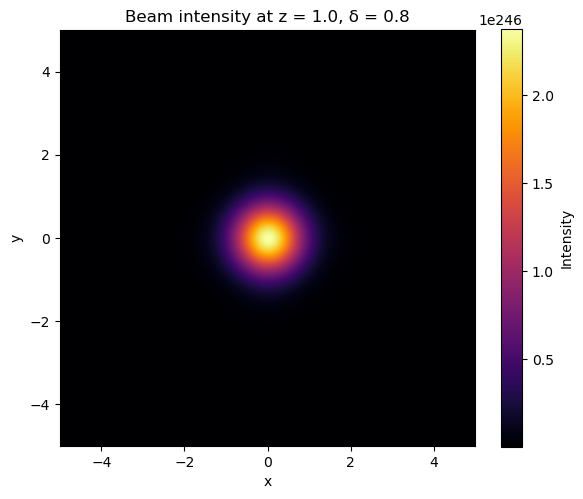

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, fftfreq
from scipy.special import gamma
import warnings
warnings.filterwarnings("error")

# --- Parameters ---
A0 = 1.0       # Amplitude
w0 = 1.0       # Beam waist
beta0 = 1.0    # Scaling constant
delta = 0.8    # Fractional order (0 < delta <= 1)
z = 1.0        # Propagation distance

# Grid setup
N = 512        # Grid size
L = 10.0       # Domain size
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]
X, Y = np.meshgrid(x, y)

# Initial Gaussian beam
A_xy0 = A0 * np.exp(-(X**2 + Y**2) / w0**2)

# Fourier space coordinates
kx = 2 * np.pi * fftshift(fftfreq(N, d=dx))
ky = 2 * np.pi * fftshift(fftfreq(N, d=dx))
KX, KY = np.meshgrid(kx, ky)
K = np.sqrt(KX**2 + KY**2)

# Fourier transform of initial field
A_k0 = fft2(A_xy0)

# Compute lambda_k
lambda_k = 0.5 * beta0**(-delta) * np.exp(-1j * np.pi * delta / 2) * (K**(2*delta))

def getPower(amplitude):
    return np.abs(amplitude) ** 2

def mittag_leffler_series(alpha, z, K=50):
    result = 0
    for k in range(K):
        result += z**k / gamma(alpha * k + 1)
    return result

def mittag_leffler_array(alpha, arg_array):
    return np.array([mittag_leffler_series(alpha, element) for element in arg_array], dtype=np.complex128)

# Mittag-Leffler factor
arg = lambda_k * z**delta
ML_factor = mittag_leffler_array(delta, arg)

# Apply solution in Fourier domain
A_kz = A_k0 * ML_factor

# Inverse FFT to get solution in real space
A_xyz = ifft2(A_kz)
I_xyz = getPower(A_xyz)  # Intensity profile

# Plotting
plt.figure(figsize=(6,5))
plt.imshow(I_xyz, extent=[-L/2, L/2, -L/2, L/2], cmap='inferno')
plt.colorbar(label='Intensity')
plt.title(f'Beam intensity at z = {z}, δ = {delta}')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()